# Examen parcial 2 (Interpolación y cálculo numérico)
* Cree un cuaderno jupyter y separe claramente cada ejercicio
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 11 am del 17.09.2021 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

## Ejercicio 1

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas y hacer un gráfico de P vs T (usar el gráfico de dispersión con puntos negros)
* b) interpolar los puntos (100 puntos) para hacer P vs T ¡MÁS SUAVE!
* c) grafique los puntos interpolados de P vs T en el mismo gráfico que el original (use el gráfico de dispersión y los puntos rojos)
* d) utilizando la derivada numérica, encuentre la capacidad calorífica. Si el scipy.misc.derivative no sirve, use numpy.gradient.
* e) compare $ C_v $ con los datos originales y $ C_V $ de los datos interpolados (grábelos en el mismo gráfico.
* f) ¿cuál es la diferencia entre scipy.misc.derivative y numpy.gradient?

*Básicamente, este ejercicio pide dos gráficos con dos curvas en cada gráfico. Los gráficos deben tener etiquetas para el eje x y el eje y y una leyenda para cada curva.

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.integrate as integrate

     Temperature      Pressure
0   4.789201e-08  1.958251e-17
1   6.625061e-08  2.055515e-17
2   8.460922e-08  2.237848e-17
3   1.029678e-07  2.534132e-17
4   1.213264e-07  2.994527e-17
5   1.396850e-07  3.681453e-17
6   1.580436e-07  4.642824e-17
7   1.764022e-07  5.895152e-17
8   1.947608e-07  7.447724e-17
9   2.131194e-07  9.347272e-17
10  2.314781e-07  1.154354e-16
11  2.498367e-07  1.374488e-16
12  2.681953e-07  1.534382e-16
13  2.865539e-07  1.671772e-16
14  3.049125e-07  1.802543e-16
15  3.232711e-07  1.929425e-16
16  3.416297e-07  2.053711e-16
17  3.599883e-07  2.176142e-16
18  3.783469e-07  2.297188e-16
19  3.967055e-07  2.417169e-16
20  4.150641e-07  2.536311e-16
21  4.334227e-07  2.654779e-16
22  4.517813e-07  2.772699e-16
23  4.701399e-07  2.890164e-16
24  4.884985e-07  3.007252e-16
25  5.068571e-07  3.124020e-16
26  5.252157e-07  3.240518e-16
27  5.435743e-07  3.356784e-16
28  5.619329e-07  3.472849e-16
29  5.802915e-07  3.588741e-16
30  5.986501e-07  3.704482e-16


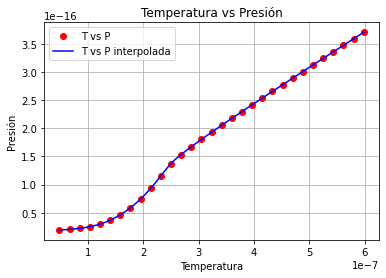

In [2]:
#Parte A
pt =pd.read_csv('data_pressure_vs_temparature.csv',delimiter=',')
print(pt)

x=pt['Temperature']
y=pt['Pressure']

#Parte B
TPinterp= interpolate.CubicSpline(x, y)
x_1=np.linspace(min(x),max(x),100)

#Parte C, gráficas T vs P
fig, TvsP=plt.subplots(1,1)

TvsP.plot(x, y, 'or', label='T vs P')
TvsP.plot(x_1, TPinterp(x_1), 'b', label='T vs P interpolada')
plt.legend()
plt.title('Temperatura vs Presión')
plt.xlabel('Temperatura')
plt.ylabel('Presión')
plt.grid()

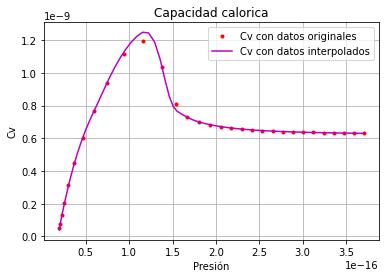

In [3]:
#Parte D
#Capacidad calorica con datos orginales
dT_0=np.gradient(x)
dP_0=np.gradient(y)
Cv_0= dP_0 / dT_0

#Capacidad calorica con datos interpolados
dT_1=np.gradient(x_1)
dP_1=np.gradient(TPinterp(x_1))
Cv_1= dP_1 / dT_1

#Parte E

fig, Cv=plt.subplots(1,1)
Cv.plot(y, Cv_0, '.r', label='Cv con datos originales')
Cv.plot(TPinterp(x_1), Cv_1, '-m', label='Cv con datos interpolados')
plt.legend()
plt.title('Capacidad calorica')
plt.xlabel('Presión')
plt.ylabel('Cv')
plt.grid()

In [4]:
PUNTO F
La diferencia entre scipy.misc.derivative y np.gradient es que la primera entrega la derivada de la función en un punto 
dado, debemos tener la función y el punto. Mientras que np.gradient sólo pide un array de puntos. En nuestro caso
derivative no funciona porque no tenemos la función. 

SyntaxError: invalid syntax (<ipython-input-4-30a048999f2c>, line 1)

## Ejercicio  2

Grafica la función:

$$ F_{a, b} = \int_0 ^{10} (sin (ax) + cos (bx^ 2)) \ dx $$

donde $ a $ es solo un número y $ b $ es una numpy arrray, digamos:

a = 1

b = np.linspace (0,1,101)

El gráfico deben tener etiquetas para eje x y eje y. 

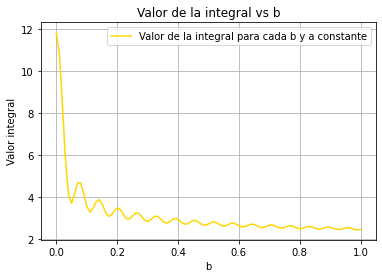

In [5]:
aa=1
N=100
a = np.linspace(aa,aa,N)
b = np.linspace(0,1,N)

def f(x, a, b):
    return np.sin(a*x) + np.cos(b*x**2)
#Se crea una lista vacía para añadir las integrales a medida que b cambia.
integral=[]
for i in range(len(b)):
    a1=tuple(a)
    b1=tuple(b)
    integral.append(integrate.quad(f, 0, 10, args=(a1[i],b[i]))[0])

#Gráfica
fig, inte=plt.subplots(1,1)
inte.plot(b, integral, 'gold', label='Valor de la integral para cada b y a constante')
plt.legend()
plt.title('Valor de la integral vs b')
plt.xlabel('b')
plt.ylabel('Valor integral')
plt.grid()

## Ejercicio  3

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio
* a) importar los datos usando pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje x y el eje y).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = 2 \pi \int_0^{r} r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* c) ¿cuál es la diferencia entre scipy.integrate.quad y np.trapz (igual que scipy.integrate.trapz)?

* si decide utilizar np.trapz (igual que scipy.integrate.trapz), ¿cuáles son los argumentos que debe pasar?

* si decide usar scipy.integrate.quad, ¿cómo puede definir la función? 

In [ ]:
#Parte A
rd=pd.read_csv('data_radius_density.csv')
print(rd.head())
r=rd['radius']
d=rd['density']

#Parte B
m= 2 * np.pi * integrate.trapezoid(d, r)
print('Masa del disco:',m)

#Parte C

#La diferencia entre scipy.integrate.quad y np.trapz es que quad pide la función a integrar y los límites de integración
#mientras que np.trapz y scipy.integrate.trapzsólo necesita un array de la variable variable dependiente Y 
#(es opcional el array con las x) y no se necesita la función definida.

#Para usar np.trapz se debe pasar el array de la variable dependiente f(x), en este caso p(r).

